In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression
from sklearn.linear_model import LassoCV, Lasso
from sklearn.feature_selection import VarianceThreshold

In [2]:
ecfp = pd.read_csv('/kaggle/input/data-pic50-ecfp6/data_pic50_ECFP6.csv')
pic50 = (pd.read_csv('/kaggle/input/data-pic50/data_pic50.csv'))['pIC50']
data = (pd.concat([ecfp, pic50], axis = 1)).drop("smiles", axis = 1)
data

,bit0,bit1,bit2,bit3,bit4,bit5,bit6,bit7,bit8,bit9,...,bit2039,bit2040,bit2041,bit2042,bit2043,bit2044,bit2045,bit2046,bit2047,pIC50
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,7.236572
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,7.130768
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.280255
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.602060
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.602060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22630,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.823909
22631,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.698970
22632,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.568636
22633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5.443697


In [3]:
data.to_csv("ECFP-new-FULL.csv")

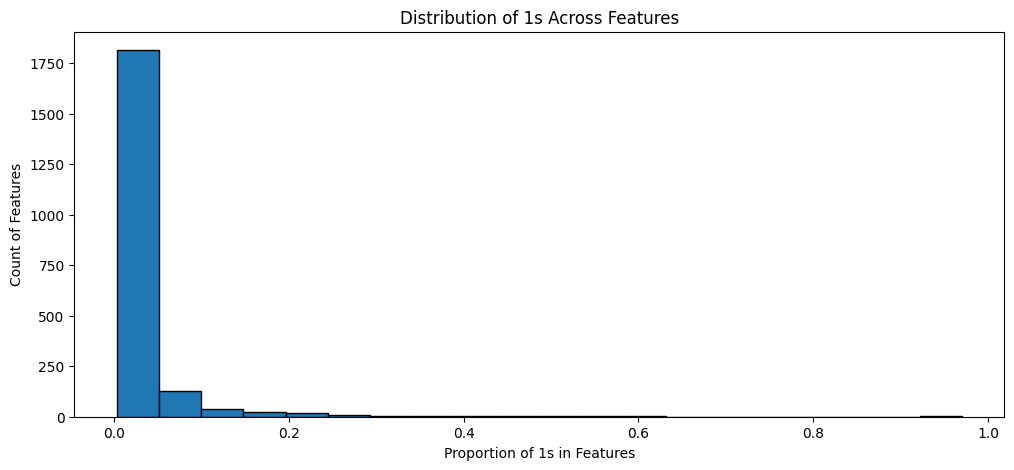

In [4]:
feature_counts = data.drop(columns=["pIC50"]).sum() / len(data)
plt.figure(figsize=(12, 5))
plt.hist(feature_counts, bins=20, edgecolor="black")
plt.xlabel("Proportion of 1s in Features")
plt.ylabel("Count of Features")
plt.title("Distribution of 1s Across Features")
plt.show()

In [5]:
fingerprint_p = data.drop(['pIC50'],axis=1)
fingerprint_p

,bit0,bit1,bit2,bit3,bit4,bit5,bit6,bit7,bit8,bit9,...,bit2038,bit2039,bit2040,bit2041,bit2042,bit2043,bit2044,bit2045,bit2046,bit2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22630,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22631,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22632,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
22633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
selector = VarianceThreshold(threshold=0.05)
data_filter = selector.fit_transform(fingerprint_p)
selected_columns = fingerprint_p.columns[selector.get_support()]
X_df_selected = pd.DataFrame(data_filter, columns=selected_columns)
X_df_selected

,bit1,bit2,bit13,bit32,bit41,bit45,bit69,bit74,bit80,bit95,...,bit1970,bit1972,bit1981,bit1984,bit1991,bit1998,bit2008,bit2013,bit2018,bit2033
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22630,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
22631,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
22632,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
22633,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


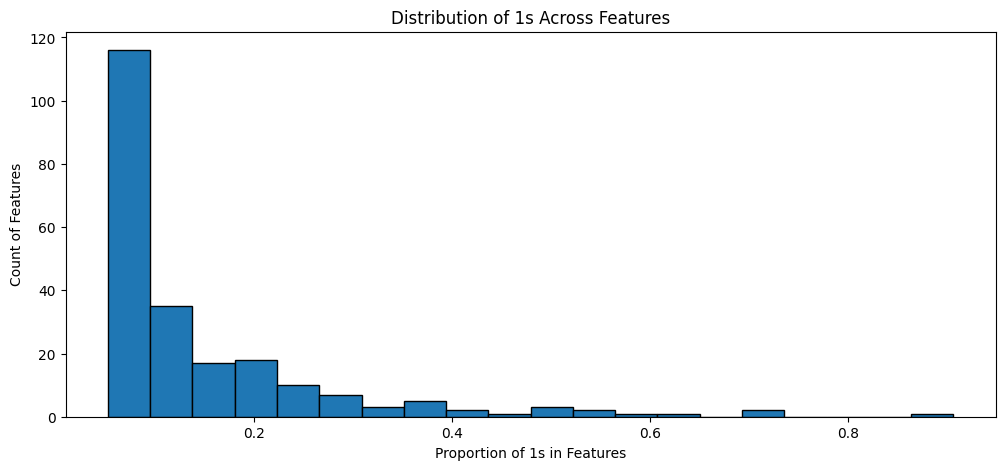

In [7]:
 feature_counts_2 = X_df_selected.sum() / len(data)
 plt.figure(figsize=(12, 5))
 plt.hist(feature_counts_2, bins=20, edgecolor="black")
 plt.xlabel("Proportion of 1s in Features")
 plt.ylabel("Count of Features")
 plt.title("Distribution of 1s Across Features")
 plt.show()

In [8]:
X = X_df_selected
y = data['pIC50']
feature_names = X.columns.tolist()

In [9]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=2/9, random_state=42)

In [10]:
lasso_cv = LassoCV(cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_train, y_train)

# Ambil alpha terbaik
best_alpha = lasso_cv.alpha_
print(f"Alpha terbaik: {best_alpha}")

# Fit ulang dengan alpha terbaik
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

# Simpan koefisien ke file
df_coef = pd.DataFrame({
    "feature": feature_names,
    "coefficient": lasso.coef_
})
df_coef.to_csv("lasso_tuned_coefficients.csv", index=False)

# Simpan semua alpha dan MSE-nya
mean_mse = lasso_cv.mse_path_.mean(axis=1)
alphas = lasso_cv.alphas_

df_alphas = pd.DataFrame({
    "alpha": alphas,
    "mean_mse": mean_mse
})

# Tambahkan MSE per fold
for i in range(lasso_cv.mse_path_.shape[1]):
    df_alphas[f"mse_fold_{i+1}"] = lasso_cv.mse_path_[:, i]

df_alphas.to_csv("lasso_alpha_tuning_results.csv", index=False)

# 🔍 Cetak 5 alpha terbaik berdasarkan mean MSE terkecil
sorted_indices = np.argsort(mean_mse)
top_5_alphas = alphas[sorted_indices[:5]]

print("\n5 alpha terbaik berdasarkan MSE rata-rata:")
for i, idx in enumerate(sorted_indices[:5], 1):
    print(f"{i}. Alpha = {alphas[idx]:.6f}, Mean MSE = {mean_mse[idx]:.6f}")

Alpha terbaik: 0.0002770231371250656

5 alpha terbaik berdasarkan MSE rata-rata:
1. Alpha = 0.000277, Mean MSE = 0.253150
2. Alpha = 0.000258, Mean MSE = 0.253151
3. Alpha = 0.000297, Mean MSE = 0.253155
4. Alpha = 0.000241, Mean MSE = 0.253157
5. Alpha = 0.000225, Mean MSE = 0.253166


In [11]:
selected_features = df_coef[df_coef["coefficient"] != 0]["feature"].tolist()
print(f"\nJumlah fitur terpilih: {len(selected_features)}")
print("Fitur terpilih:")
print(selected_features)

# 6. (Opsional) Simpan fitur terpilih ke file
pd.Series(selected_features, name="selected_feature").to_csv("selected_features.csv", index=False)


Jumlah fitur terpilih: 197
Fitur terpilih:
['bit1', 'bit2', 'bit32', 'bit41', 'bit45', 'bit69', 'bit80', 'bit95', 'bit103', 'bit114', 'bit140', 'bit145', 'bit147', 'bit165', 'bit191', 'bit197', 'bit207', 'bit222', 'bit227', 'bit231', 'bit237', 'bit249', 'bit251', 'bit255', 'bit273', 'bit283', 'bit289', 'bit294', 'bit305', 'bit310', 'bit314', 'bit319', 'bit329', 'bit350', 'bit352', 'bit366', 'bit378', 'bit385', 'bit389', 'bit392', 'bit407', 'bit430', 'bit463', 'bit464', 'bit486', 'bit491', 'bit500', 'bit507', 'bit561', 'bit591', 'bit601', 'bit615', 'bit620', 'bit650', 'bit656', 'bit673', 'bit674', 'bit675', 'bit679', 'bit680', 'bit687', 'bit690', 'bit694', 'bit695', 'bit699', 'bit703', 'bit715', 'bit718', 'bit722', 'bit724', 'bit725', 'bit736', 'bit745', 'bit750', 'bit781', 'bit784', 'bit790', 'bit794', 'bit798', 'bit807', 'bit809', 'bit821', 'bit835', 'bit841', 'bit843', 'bit875', 'bit881', 'bit926', 'bit932', 'bit961', 'bit975', 'bit980', 'bit984', 'bit1004', 'bit1017', 'bit1019', 'b

In [12]:
df_nonzero = df_coef[df_coef["coefficient"] != 0].copy()
df_nonzero["abs_coef"] = df_nonzero["coefficient"].abs()
df_sorted = df_nonzero.sort_values(by="abs_coef", ascending=False)

n_total = len(df_sorted)
n_25 = max(1, int(n_total * 0.25))
n_50 = max(1, int(n_total * 0.50))
n_75 = max(1, int(n_total * 0.75))
n_100 = max(1, int(n_total * 1))

top_25_features = df_sorted.head(n_25)["feature"].tolist()
top_50_features = df_sorted.head(n_50)["feature"].tolist()
top_75_features = df_sorted.head(n_75)["feature"].tolist()
top_100_features = df_sorted.head(n_100)["feature"].tolist()

print(f"\nTop 25% fitur: ({n_25} fitur)\n", top_25_features)
print(f"\nTop 50% fitur: ({n_50} fitur)\n", top_50_features)
print(f"\nTop 75% fitur: ({n_75} fitur)\n", top_75_features)
print(f"\nTop 75% fitur: ({n_100} fitur)\n", top_100_features)



Top 25% fitur: (49 fitur)
 ['bit1453', 'bit1143', 'bit251', 'bit430', 'bit722', 'bit103', 'bit601', 'bit718', 'bit1257', 'bit1162', 'bit1677', 'bit237', 'bit1160', 'bit1738', 'bit1666', 'bit1998', 'bit207', 'bit1917', 'bit1508', 'bit1733', 'bit1309', 'bit1224', 'bit1876', 'bit1004', 'bit32', 'bit1171', 'bit1538', 'bit781', 'bit881', 'bit1480', 'bit1631', 'bit329', 'bit1019', 'bit1299', 'bit1911', 'bit1292', 'bit1670', 'bit695', 'bit2008', 'bit165', 'bit1279', 'bit673', 'bit273', 'bit69', 'bit507', 'bit1573', 'bit1564', 'bit620', 'bit1417']

Top 50% fitur: (98 fitur)
 ['bit1453', 'bit1143', 'bit251', 'bit430', 'bit722', 'bit103', 'bit601', 'bit718', 'bit1257', 'bit1162', 'bit1677', 'bit237', 'bit1160', 'bit1738', 'bit1666', 'bit1998', 'bit207', 'bit1917', 'bit1508', 'bit1733', 'bit1309', 'bit1224', 'bit1876', 'bit1004', 'bit32', 'bit1171', 'bit1538', 'bit781', 'bit881', 'bit1480', 'bit1631', 'bit329', 'bit1019', 'bit1299', 'bit1911', 'bit1292', 'bit1670', 'bit695', 'bit2008', 'bit165',

In [13]:
df_25 = fingerprint_p[top_25_features].copy()
df_25['pIC50'] = data['pIC50']

df_50 = fingerprint_p[top_50_features].copy()
df_50['pIC50'] = data['pIC50']

df_75 = fingerprint_p[top_75_features].copy()
df_75['pIC50'] = data['pIC50']


df_100 = fingerprint_p[top_100_features].copy()
df_100['pIC50'] = data['pIC50']

In [14]:
df_25.to_csv("DATASET-ECFP-FS-25.csv", index=False)
df_50.to_csv("DATASET-ECFP-FS-50.csv", index=False)
df_75.to_csv("DATASET-ECFP-FS-75.csv", index=False)
df_100.to_csv("DATASET-ECFP-FS-100.csv", index=False)